In [4]:
import tkinter as tk
from tkinter import filedialog
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

import json


✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#128 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/Stanton_with_128_132_134.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#129 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/Stanton_with_128_132_134.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#130 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/Stanton_with_128_132_134.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250723 exp#131 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/Stanton_with_128_132_134.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250723 exp#132 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/Stanton_with_128_13

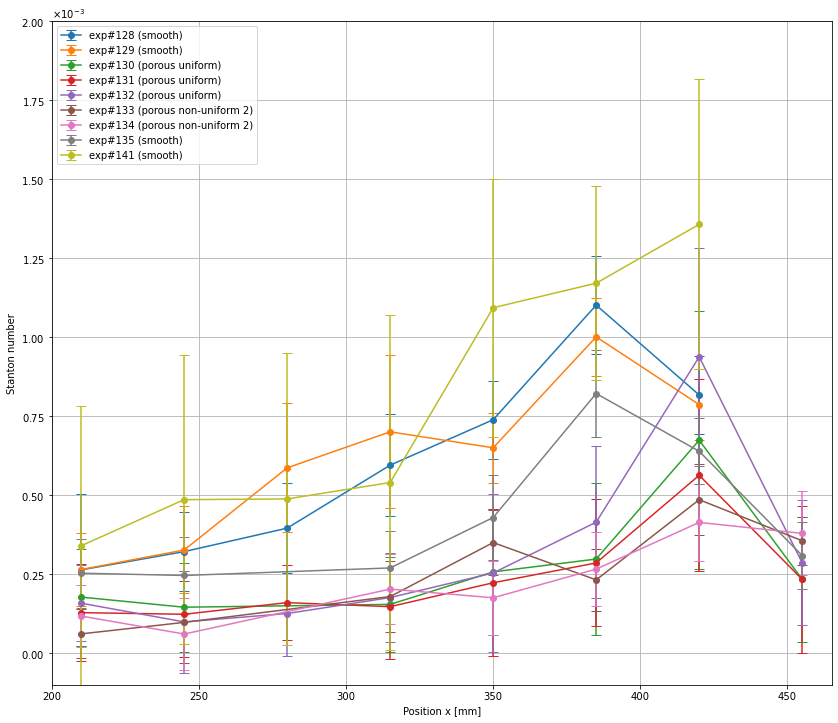

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# 실험 폴더 리스트
experiment_folders = [
    '250718 exp#128 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    '250718 exp#129 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    '250718 exp#130 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250723 exp#131 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250723 exp#132 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250725 exp#133 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250725 exp#134 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250729 exp#135 half half cone non-uniform 2 PET150 x23 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    '250917 exp#141 HHC Al 5T #173  driven 0.2barg He M6.8 2.5MHz FL200 TC'
]
# 실험 번호 → 시간 범위 매핑
# # 실험 번호 → 시간 범위 매핑
time_ranges = {
    128: (2.3, 3.3),
    129: (1.8, 2.8),
    130: (7.4, 8.4),
    131: (9.2, 10.2),
    132: (9.2, 10.2),
    133: (11.4-7.5, 11.5-7.5), 
    134: (10-7.5, 11-7.5),
    135: (9.9, 10.9),
    141: (2.8, 3.8),
}


# # 실험 번호 → 시간 범위 매핑
# time_ranges = {
#     128: (2.3, 3.3),
#     129: (1.7, 2.7),
#     130: (8.6, 9.6),
#     131: (10.4, 11.4),
#     132: (10.2, 11.2),
#     133: (10.4, 11.4),
#     134: (11, 12),
#     135: (10.2, 11.2),
#     141: (2.7, 3.7),
# }

# # 실험 번호 → 시간 범위 매핑
# time_ranges = {
#     128: (2.65, 2.75),
#     129: (2.5, 2.6),
#     130: (9.5, 9.6),
#     131: (10.7, 10.8),
#     132: (10.8, 10.9),
#     133: (9.8, 9.8+0.05),
#     134: (10.3, 10.35),
#     135: (10.2, 10.3),
#     141: (2.1, 2.2),
# }

#9.75 10.4 9.55, 9.75 9.8

# 실험 번호별 legend 라벨 지정
legend_labels = {
    128: "exp#128 (smooth)",
    129: "exp#129 (smooth)",
    130: "exp#130 (porous uniform)",
    131: "exp#131 (porous uniform)",
    132: "exp#132 (porous uniform)",
    133: "exp#133 (porous non-uniform 2)",
    134: "exp#134 (porous non-uniform 2)",
    135: "exp#135 (smooth)",
    141: "exp#141 (smooth)",
}

# 체크리스트 파일 경로
checklist_path = "/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/SHyST Exp Check List ver1.xlsx"
checklist_data = pd.read_excel(checklist_path, header=2)

# Stanton 수 분모 계산 함수
def st_denom(rho7, a7, T7, Tw=273.15):
    rho_e = rho7 * 1.74428290
    u_e = (a7 * (1.25341069 ** 0.5)) * 5.95162128
    c_p = 1022.08
    T_r = T7 * 1.25341069 * (1 + 0.83 * (0.39/2) * 5.95162128**2)
    return rho_e * u_e * c_p * (T_r - Tw)

# 플롯 설정
plt.figure(figsize=(12, 10))

for folder_name in experiment_folders:
    folder_path = os.path.join(
        '/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci',
        folder_name
    )
    heatflux_file = os.path.join(folder_path, "HeatFlux_data_for_gnuplot.dat")

    exp_num = int(folder_name.split("exp#")[1].split()[0])
    start_ms, end_ms = time_ranges[exp_num]

    df_q = pd.read_csv(heatflux_file, sep="\t")
    df_q_range = df_q[(df_q["time [ms]"] >= start_ms) & (df_q["time [ms]"] <= end_ms)]

    positions, means, stds = [], [], []
    for col in df_q_range.columns[1:]:
        pos = col.split("@")[1].replace("mm", "")
        q_values = df_q_range[col]
        positions.append(int(pos))
        means.append(q_values.mean())
        stds.append(q_values.std())

    sorted_data = sorted(zip(positions, means, stds))
    positions, means, stds = zip(*sorted_data)

    row = checklist_data[checklist_data['#'] == exp_num]
    if row.empty:
        print(f"[경고] 실험 #{exp_num} 체크리스트에서 찾을 수 없음.")
        continue

    rho7 = row.iloc[0]['Stage 7 rho (kg/m**3)']
    a7 = row.iloc[0]['Stage 7 a (m/s)']
    T7 = row.iloc[0]['Stage 7 T (K)']
    denom = st_denom(rho7, a7, T7)

    stanton = [q / denom for q in means]
    stanton_std = [s / denom for s in stds]

    plt.errorbar(
        positions, stanton, yerr=stanton_std, fmt='o-', capsize=5,
        label=legend_labels.get(exp_num, f"exp#{exp_num}")
    )

# 공통 그래프 설정
plt.xlabel("Position x [mm]")
plt.ylabel("Stanton number")
plt.xlim(200, 465)
plt.ylim(-0.0001, 0.0020)
plt.grid(True)
plt.legend()
plt.tight_layout()

# y축 10^-3으로 표시
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(10)

# 모든 폴더에 Stanton.pdf 저장
for folder_name in experiment_folders:
    folder_path = os.path.join(
        '/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci',
        folder_name
    )
    save_path = os.path.join(folder_path, "Stanton_with_128_132_134.pdf")
    plt.savefig(save_path, dpi=600, bbox_inches='tight')
    print(f"✅ 저장 완료: {save_path}")

plt.show()


137747954.46846816
129985644.6685798
143831121.16691905
134174582.72485039
134443420.53923035
136114094.82668585
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#128 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/St_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#129 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/St_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#130 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/St_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250723 exp#131 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/St_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250725 exp#133 half half cone2 PET150 x23 driven

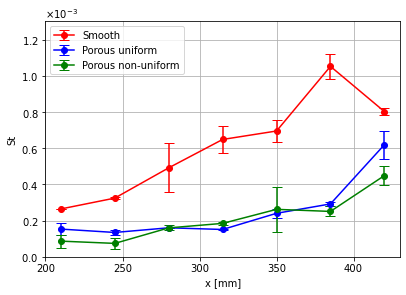

✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#128 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/HeatFlux_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#129 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/HeatFlux_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#130 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/HeatFlux_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250723 exp#131 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/HeatFlux_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250725 exp#133 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/HeatFlux_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dr

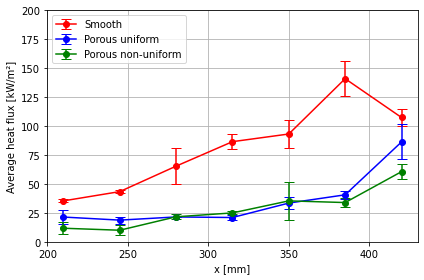

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# ===== 경로/입력 =====
base_dir = '/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci'
# 실험 폴더 리스트
experiment_folders = [
    '250718 exp#128 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    '250718 exp#129 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    '250718 exp#130 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250723 exp#131 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250723 exp#132 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250725 exp#133 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250725 exp#134 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250729 exp#135 half half cone non-uniform 2 PET150 x23 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    '250917 exp#141 HHC Al 5T #173  driven 0.2barg He M6.8 2.5MHz FL200 TC'
]

# # 실험 번호 → 시간 범위 매핑
time_ranges = {
    128: (2.3, 3.3),
    129: (1.8, 2.8),
    130: (7.4, 8.4),
    131: (9.2, 10.2),
    132: (9.2, 10.2),
    133: (11.4-7.5, 11.5-7.5), 
    134: (10-7.5, 11-7.5),
    135: (9.9, 10.9),
    141: (2.8, 3.8),
}


# # 실험 번호 → 시간 범위 매핑
# time_ranges = {
#     128: (2.65, 2.75),
#     129: (2.5, 2.6),
#     130: (9.5, 9.6),
#     131: (10.7, 10.8),
#     132: (10.8, 10.9),
#     133: (9.8, 9.8+0.05),
#     134: (10.3, 10.35),
#     135: (10.2, 10.3),
#     141: (2.1, 2.2),
# }

checklist_path = "/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/SHyST Exp Check List ver1.xlsx"
checklist_data = pd.read_excel(checklist_path, header=2)

# ===== 그룹/라벨 =====
groups = {
    "Smooth": [128, 129, 135, 141], #135
    "Porous uniform": [130, 131, 132],
    "Porous non-uniform": [133, 134],
}
exclude_exps = {132, 135, 141}

# ===== 그룹별 색상 =====
group_colors = {
    "Smooth": "red",
    "Porous uniform": "blue",
    "Porous non-uniform": "green"
}

# ===== Stanton 분모 =====
# ===== Stanton 분모 =====
def st_denom(rho7, a7, T7, Tw=273.15,
             gamma=1.39,
             Te_over_T1=1.25341069,
             rhoe_over_rho1=1.74428290,
             Me=5.95162128,
             r=0.83,
             cp_const=1022.08,
             verbose=False,
             tag=""):
    # edge values from Stage-7 (free stream) using conical-shock ratios
    rho_e = rho7 * rhoe_over_rho1
    a_e   = a7 * (Te_over_T1 ** 0.5)
    u_e   = Me * a_e
    T_e   = T7 * Te_over_T1

    # recovery temperature
    A     = 0.5 * (gamma - 1.0) * (Me ** 2)
    T_r   = T_e * (1.0 + r * A)

    # denominator
    cp    = cp_const
    denom = rho_e * u_e * cp * (T_r - Tw)

    if verbose:
        print(f"\n[DEBUG {tag}]")
        print(f"rho7={rho7:.6e}, a7={a7:.2f}, T7={T7:.2f}, Tw={Tw:.2f}")
        print(f"ratios: Te/T1={Te_over_T1:.8f}, rhoe/rho1={rhoe_over_rho1:.8f}, Me={Me:.6f}, gamma={gamma:.5f}, r={r:.2f}")
        print(f"edge:   rho_e={rho_e:.6e}, a_e={a_e:.2f}, u_e={u_e:.2f}, T_e={T_e:.2f}")
        print(f"Tr term A=((γ-1)/2)Me^2={A:.6f}  -> T_r={T_r:.2f}  (Tr-Tw)={T_r-Tw:.2f}")
        print(f"cp={cp:.2f}  denom=rho_e*u_e*cp*(Tr-Tw)={denom:.6e} W/m^2")
    print(denom)
    return denom


def expnum_from_folder(name: str) -> int:
    return int(name.split("exp#")[1].split()[0])

# ===== 한 실험의 (x, q_mean[W/m^2], St_mean) 취득. x=455 제외 =====
def load_q_and_st_vs_x(folder_name: str):
    exp_num = expnum_from_folder(folder_name)
    if exp_num in exclude_exps:
        return None

    folder_path = os.path.join(base_dir, folder_name)
    heatflux_file = os.path.join(folder_path, "HeatFlux_data_for_gnuplot.dat")
    start_ms, end_ms = time_ranges[exp_num]

    df_q = pd.read_csv(heatflux_file, sep="\t")
    df_q_range = df_q[(df_q["time [ms]"] >= start_ms) & (df_q["time [ms]"] <= end_ms)]

    row = checklist_data[checklist_data['#'] == exp_num]
    if row.empty:
        raise RuntimeError(f"[경고] 실험 #{exp_num} 체크리스트에서 찾을 수 없음.")
    rho7 = row.iloc[0]['Stage 7 rho (kg/m**3)']
    a7  = row.iloc[0]['Stage 7 a (m/s)']
    T7  = row.iloc[0]['Stage 7 T (K)']
    denom = st_denom(rho7, a7, T7)

    xs, q_means, st_means = [], [], []
    for col in df_q_range.columns[1:]:
        pos = int(col.split("@")[1].replace("mm", ""))
        if pos == 455:
            continue
        q_mean = df_q_range[col].mean()            # [W/m^2]
        st_mean = q_mean / denom
        xs.append(pos)
        q_means.append(q_mean)
        st_means.append(st_mean)

    xs, q_means, st_means = zip(*sorted(zip(xs, q_means, st_means)))
    return list(xs), list(q_means), list(st_means)

# ===== 모든 실험 로드 =====
per_exp_q = {}
per_exp_st = {}
for folder in experiment_folders:
    res = load_q_and_st_vs_x(folder)
    if res is None:
        continue
    exp_num = expnum_from_folder(folder)
    xs, q_means, st_means = res
    per_exp_q[exp_num]  = dict(zip(xs, q_means))
    per_exp_st[exp_num] = dict(zip(xs, st_means))

# ===== 그룹별 평균/표준편차(실험 간): 존재하는 데이터만 평균 =====
def group_curve(per_exp_dict, exp_list):
    exp_list = [e for e in exp_list if e in per_exp_dict]
    if not exp_list:
        return [], [], []

    # 교집합 대신 "합집합" 사용 → 위치별로 존재하는 값만 수집/평균
    all_positions = sorted(set().union(*[set(per_exp_dict[e].keys()) for e in exp_list]))
    positions, means, stds = [], [], []
    for x in all_positions:
        vals = [per_exp_dict[e][x] for e in exp_list if x in per_exp_dict[e]]
        if len(vals) == 0:
            continue
        positions.append(x)
        arr = np.array(vals, dtype=float)
        means.append(arr.mean())
        stds.append(arr.std(ddof=1) if len(arr) > 1 else 0.0)
    return positions, means, stds

group_st = {}
group_q  = {}
for gname, elist in groups.items():
    xs_st, ys_st, st_err = group_curve(per_exp_st, elist)
    xs_q,  ys_q,  q_err  = group_curve(per_exp_q, elist)
    group_st[gname] = (xs_st, ys_st, st_err)
    group_q[gname]  = (xs_q,  [v/1000.0 for v in ys_q], [e/1000.0 for e in q_err])  # kW/m^2

# ===== Plot 1: St =====
plt.figure(figsize=(6, 4))
for gname, (xs, ys, yerr) in group_st.items():
    if xs:
        plt.errorbar(xs, ys, yerr=yerr, fmt='o-', capsize=5,
                     label=gname, color=group_colors.get(gname))
plt.xlabel("x [mm]")
plt.ylabel("St")
plt.xlim(200, 430)
plt.ylim(0, 0.0013)
plt.grid(True)
plt.legend()
plt.tight_layout()
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(10)

outfile_st = "St_grouped.pdf"
for folder in experiment_folders:
    if expnum_from_folder(folder) in exclude_exps:
        continue
    path = os.path.join(base_dir, folder, outfile_st)
    plt.savefig(path, dpi=600, bbox_inches='tight')
    print(f"✅ 저장 완료: {path}")
plt.show()

# ===== Plot 2: Average heat flux [kW/m^2] =====
plt.figure(figsize=(6, 4))
for gname, (xs, ys, yerr) in group_q.items():
    if xs:
        plt.errorbar(xs, ys, yerr=yerr, fmt='o-', capsize=5,
                     label=gname, color=group_colors.get(gname))
plt.xlabel("x [mm]")
plt.ylabel("Average heat flux [kW/m²]")
plt.xlim(200, 430)
plt.ylim(0, 200)
plt.grid(True)
plt.legend()
plt.tight_layout()

outfile_q = "HeatFlux_grouped.pdf"
for folder in experiment_folders:
    if expnum_from_folder(folder) in exclude_exps:
        continue
    path = os.path.join(base_dir, folder, outfile_q)
    plt.savefig(path, dpi=600, bbox_inches='tight')
    print(f"✅ 저장 완료: {path}")
plt.show()


✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#128 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/HeatFlux_Ratio_to_Smooth.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#129 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/HeatFlux_Ratio_to_Smooth.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#130 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/HeatFlux_Ratio_to_Smooth.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250723 exp#131 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/HeatFlux_Ratio_to_Smooth.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250725 exp#133 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/HeatFlux_Ratio_to_

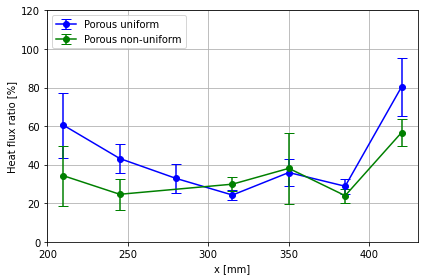

In [7]:
# ===== Plot 3: Heat flux ratio to Smooth [%] with error bars (using SE) =====
plt.figure(figsize=(6, 4))

# Smooth 기준값
xs_ref, ys_ref, err_ref = group_q["Smooth"]
ref_dict_mean = dict(zip(xs_ref, ys_ref))
ref_dict_se   = dict(zip(xs_ref, err_ref))   # 이미 σ/√n 값이 들어있다고 가정

# Porous 그룹들에 대해 비율 계산
for gname in ["Porous uniform", "Porous non-uniform"]:
    if gname not in group_q:
        continue
    xs, ys, errs = group_q[gname]
    ratios, ratio_errs, positions = [], [], []
    for x, y, e in zip(xs, ys, errs):
        if x in ref_dict_mean:
            mean_ref = ref_dict_mean[x]
            se_ref   = ref_dict_se[x]

            # 비율 [%]
            ratio = y / mean_ref * 100

            # 비율 표준오차 propagation
            if y > 0 and mean_ref > 0:
                ratio_se = ratio * np.sqrt((e / y) ** 2 + (se_ref / mean_ref) ** 2)
            else:
                ratio_se = 0.0

            ratios.append(ratio)
            ratio_errs.append(ratio_se)
            positions.append(x)

    # Plot with error bars
    plt.errorbar(positions, ratios, yerr=ratio_errs, fmt='o-', capsize=5,
                 color=group_colors.get(gname), label=gname)

# Target 50% 점선
# plt.axhline(y=50, color='red', linestyle='--', label='Target')

# 출력 설정
plt.xlabel("x [mm]")
plt.ylabel("Heat flux ratio [%]")
plt.xlim(200, 430)
plt.ylim(0, 120)
plt.grid(True)
plt.legend(loc="upper left")
plt.tight_layout()

# 저장
outfile_ratio = "HeatFlux_Ratio_to_Smooth.pdf"
for folder in experiment_folders:
    if expnum_from_folder(folder) in exclude_exps:
        continue
    path = os.path.join(base_dir, folder, outfile_ratio)
    plt.savefig(path, dpi=600, bbox_inches='tight')
    print(f"✅ 저장 완료: {path}")

plt.show()


=== 엣지 상태 ===
rho_inf = 4.653805e-02 kg/m^3
rho_e   = 8.117553e-02 kg/m^3
T_e     = 207.14 K
a_e     = 287.54 m/s
u_e     = 1711.30 m/s
p_e     = 4826.50 Pa

=== 온도 스케일 ===
(γ-1)/2 * Me^2 = 6.916283
T_r   (recovery)   = 1396.22 K
T*    (Eckert ref) = 510.67 K
rho*    (Eckert ref) = 3.292669e-02 kg/m^3

=== 점도/물성 ===
mu(T_e)   = 1.368926e-05 Pa·s   (참고)
mu(T*)    = 2.711775e-05 Pa·s (사용)
mu(T_r)   = 5.056603e-05 Pa·s   (참고)
cp*       = 1022.09 J/(kg·K)
Pr        = 0.7200,  Pr^(-2/3) = 1.244835

=== 레이놀즈수 스케일 ===
Re*_per_meter = 5.122684e+06 1/m

=== CSV (엑셀 복붙) ===
x_mm,Re_x_star,St_lam,St_turb
10.0,5.122684e+04,1.826001e-03,4.212150e-03
20.0,1.024537e+05,1.291178e-03,3.666890e-03
30.0,1.536805e+05,1.054242e-03,3.381268e-03
40.0,2.049074e+05,9.130004e-04,3.192213e-03
50.0,2.561342e+05,8.166124e-04,3.052881e-03
60.0,3.073610e+05,7.454617e-04,2.943565e-03
70.0,3.585879e+05,6.901634e-04,2.854199e-03
80.0,4.098147e+05,6.455888e-04,2.778983e-03
90.0,4.610416e+05,6.086669e-04,2.714284e-03
100

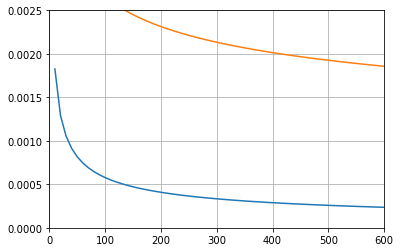

In [8]:
# -*- coding: utf-8 -*-
import math

# ===================== 입력(필수) =====================
# 자유류 (정정 반영)
M_inf = 6.76
T_inf = 165.26  #156.31175          # K
p_inf = 2207.61       # Pa
U_inf = 1735.97         # m/s (참고; 아래 계산에는 직접 사용 안함)

# 가스/상수
gamma = 1.39051
R = 287.042625             # J/(kg·K)

# 콘-쇼크(7°, γ=1.39) 계산기 비율 (이미지 기반 상수)
Te_over_T1     = 1.25341069 #1.22016125 # 1.25341069
rhoe_over_rho1 = 1.74428290 #1.64298941 #1.74428290
Me             =  5.95162128 #5.48385249 #5.95162128

# 벽온도, 회복계수, Pr
T_w = 291.0           # K  (필요 시 273.15로 교체)
r   = 0.83
Pr  = 0.72            # 엣지 조건에서 합리적 추정

# Sutherland 상수 (공기)
mu0 = 1.716e-5        # Pa·s at T0
T0  = 273          # K
S   = 111           # K

# 출력 x 위치(mm)
x_list_mm = np.linspace(10,600,60)

# ===================== 함수 =====================
def mu_suth(T):
    """Sutherland's law for air [Pa·s]."""
    return mu0 * (T/T0)**1.5 * (T0 + S) / (T + S)

def cp_from_gamma(gamma, R):
    """완전기체 cp [J/(kg·K)] (gamma 상수 가정)."""
    return gamma/(gamma-1.0)*R

# ===================== 1) 자유류 -> 엣지 상태 =====================
rho_inf = p_inf/(R*T_inf)
rho_e = rho_inf * rhoe_over_rho1
T_e  = T_inf * Te_over_T1
a_e  = math.sqrt(gamma*R*T_e)
u_e  = Me * a_e
p_e  = rho_e * R * T_e

print("=== 엣지 상태 ===")
print(f"rho_inf = {rho_inf:.6e} kg/m^3")
print(f"rho_e   = {rho_e:.6e} kg/m^3")
print(f"T_e     = {T_e:.2f} K")
print(f"a_e     = {a_e:.2f} m/s")
print(f"u_e     = {u_e:.2f} m/s")
print(f"p_e     = {p_e:.2f} Pa")

# ===================== 2) 회복온도 Tr, 참조온도 T* =====================
A = 0.5*(gamma-1.0)*(Me**2)   # (γ-1)/2 * Me^2
T_r = T_e*(1.0 + r*A)
T_star = T_e + 0.5*(T_w - T_e) + 0.22*(T_r - T_e)
rho_star=rho_e*T_e/T_star

print("\n=== 온도 스케일 ===")
print(f"(γ-1)/2 * Me^2 = {A:.6f}")
print(f"T_r   (recovery)   = {T_r:.2f} K")
print(f"T*    (Eckert ref) = {T_star:.2f} K")
print(f"rho*    (Eckert ref) = {rho_star:.6e} kg/m^3")

# ===================== 3) 점도/물성 (참조온도에서) =====================
mu_e     = mu_suth(T_e)      # 참고용
mu_star  = mu_suth(T_star)   # 참조온도법에서 사용하는 점도
mu_Tr    = mu_suth(T_r)      # 참고용

cp_star  = cp_from_gamma(gamma, R)  # 여기서는 gamma 고정 가정
# k*는 쓰지 않지만, 엄밀히는 k*(T*)로 Pr*=mu* cp*/k* 평가(여기선 Pr=0.72 사용)
Pr_factor = Pr**(-2.0/3.0)

print("\n=== 점도/물성 ===")
print(f"mu(T_e)   = {mu_e:.6e} Pa·s   (참고)")
print(f"mu(T*)    = {mu_star:.6e} Pa·s (사용)")
print(f"mu(T_r)   = {mu_Tr:.6e} Pa·s   (참고)")
print(f"cp*       = {cp_star:.2f} J/(kg·K)")
print(f"Pr        = {Pr:.4f},  Pr^(-2/3) = {Pr_factor:.6f}")

# ===================== 4) 단위 별표 Re와 St 이론식 =====================
Re_per_m_star = (rho_e*u_e)/mu_star   # 1/m
print("\n=== 레이놀즈수 스케일 ===")
print(f"Re*_per_meter = {Re_per_m_star:.6e} 1/m")

def st_lam(Re_x_star):
    return 0.332*(Re_x_star**-0.5)*Pr_factor

def st_turb(Re_x_star):
    return 0.0296*(Re_x_star**-0.2)*Pr_factor

# ===================== 5) 테이블 출력 (엑셀 복붙용) =====================
print("\n=== CSV (엑셀 복붙) ===")
print("x_mm,Re_x_star,St_lam,St_turb")
St_l_list=[]
St_t_list=[]
for x_mm in x_list_mm:
    x = x_mm/1000.0
    Re_x_star = Re_per_m_star * x
    St_l = st_lam(Re_x_star)
    St_t = st_turb(Re_x_star)
    St_l_list.append(St_l)
    St_t_list.append(St_t)
    print(f"{x_mm},{Re_x_star:.6e},{St_l:.6e},{St_t:.6e}")

# ===================== 6) 실험 St 분모(참고) =====================
denom = rho_e * u_e * cp_star * (T_r - T_w)
print("\n=== 실험 St 분모 스케일 (참고) ===")
print(f"rho_e * u_e * cp* * (T_r - T_w) = {denom:.6e} W/m^2")


plt.plot(x_list_mm,St_l_list)
plt.plot(x_list_mm,St_t_list)
plt.grid(True)
plt.xlim(00,600)
plt.ylim(0,0.0025)
plt.show()

✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#128 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/St_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#129 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/St_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#130 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/St_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250723 exp#131 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/St_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250725 exp#133 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/St_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Lab

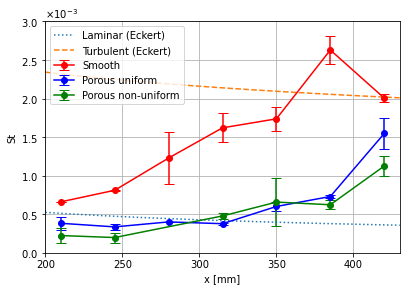

In [9]:
# ===== 이론적 Stanton 계산 (Plot 전에 실행) =====
def _mu_suth_theory(T, mu0=1.716e-5, T0=273.0, S=111.0):
    return mu0 * (T/T0)**1.5 * (T0 + S) / (T + S)

def _cp_from_gamma(gamma, R):
    return gamma/(gamma-1.0)*R

# 상수
_gamma = 1.39051
_R     = 287.042625
T_inf_theory  = 156.31175
p_inf_theory  = 1967.30125
Te_over_T1    = 1.25341069
rhoe_over_rho1= 1.74428290
Me_theory     = 5.95162128
r_rec         = 0.83
Pr_theory     = 0.72
T_w_theory    = 291.0   # 이론선 벽온도

# 엣지 조건
rho_inf_th = p_inf_theory/(_R*T_inf_theory)
rho_e_th   = rho_inf_th * rhoe_over_rho1
T_e_th     = T_inf_theory * Te_over_T1
a_e_th     = np.sqrt(_gamma*_R*T_e_th)
u_e_th     = Me_theory * a_e_th
p_e_th     = rho_e_th * _R * T_e_th  # edge pressure

# 회복온도 & 참조온도 (Eckert Eq.20)
A_th       = 0.5*(_gamma - 1.0)*(Me_theory**2)
T_r_th     = T_e_th*(1.0 + r_rec*A_th)
T_star_th  = T_e_th + 0.50*(T_w_theory - T_e_th) + 0.22*(T_r_th - T_e_th)

# 참조 물성 (T*)
mu_star_th  = _mu_suth_theory(T_star_th)
cp_star_th  = _cp_from_gamma(_gamma, _R)   # gamma 고정 가정
rho_star_th = p_e_th/(_R*T_star_th)        # p_e 불변 가정 → ρ* 사용
Pr_fac_th   = (Pr_theory)**(-2.0/3.0)

# Re*_x 스케일
Re_per_m_star_th = (rho_e_th*u_e_th)/mu_star_th

# 이론선용 x 그리드
x_grid_mm = np.linspace(200.0, 430.0, 200)
x_grid_m  = x_grid_mm/1000.0
Re_x_star_th = Re_per_m_star_th * x_grid_m

# 이론 Stanton (층류/난류)
St_l_theory = 0.332 * (Re_x_star_th**-0.5) * Pr_fac_th *3**0.2
St_t_theory = (0.0296) * (Re_x_star_th**-0.2) * Pr_fac_th



# ===== Plot 1: St =====

a=2.5

plt.figure(figsize=(6, 4))
for gname, (xs, ys, yerr) in group_st.items():
    if xs:
        # ▶ y값과 에러바를 2배로 스케일링
        ys_scaled   = [v*a for v in ys]
        yerr_scaled = [e*a for e in yerr]
        plt.errorbar(xs, ys_scaled, yerr=yerr_scaled, fmt='o-', capsize=5,
                     label=gname, color=group_colors.get(gname))

# ▶ 이론선(점선) 오버레이 (그대로 유지)
plt.plot(x_grid_mm, St_l_theory, linestyle=':', label='Laminar (Eckert)')
plt.plot(x_grid_mm, St_t_theory, linestyle='--', label='Turbulent (Eckert)')

plt.xlabel("x [mm]")
plt.ylabel("St")
plt.xlim(200, 430)

# ▶ 이론선이 보이도록 y-limit 자동 조정 (실험 값 2배 포함해서 반영됨)
plt.ylim(0, 0.003)

plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(10)

outfile_st = "St_grouped.pdf"
for folder in experiment_folders:
    if expnum_from_folder(folder) in exclude_exps:
        continue
    path = os.path.join(base_dir, folder, outfile_st)
    plt.savefig(path, dpi=600, bbox_inches='tight')
    print(f"✅ 저장 완료: {path}")
plt.show()


✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#128 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/HF_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#129 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/HF_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#130 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/HF_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250723 exp#131 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/HF_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250725 exp#133 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/HF_grouped.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Lab

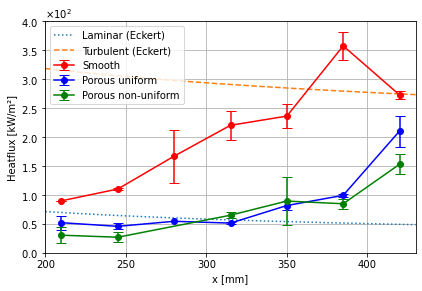

In [10]:
plt.figure(figsize=(6, 4))
for gname, (xs, ys, yerr) in group_st.items():
    if xs:
        # ▶ y값과 에러바를 2배로 스케일링
        ys_scaled   = [v*a*136049.47 for v in ys]
        yerr_scaled = [e*a*136049.47 for e in yerr]
        plt.errorbar(xs, ys_scaled, yerr=yerr_scaled, fmt='o-', capsize=5,
                     label=gname, color=group_colors.get(gname))

# ▶ 이론선(점선) 오버레이 (그대로 유지)
plt.plot(x_grid_mm, St_l_theory*136049.47, linestyle=':', label='Laminar (Eckert)')
plt.plot(x_grid_mm, St_t_theory*136049.47, linestyle='--', label='Turbulent (Eckert)')

plt.xlabel("x [mm]")
plt.ylabel("Heatflux [kW/m²]")
plt.xlim(200, 430)

# ▶ 이론선이 보이도록 y-limit 자동 조정 (실험 값 2배 포함해서 반영됨)
plt.ylim(0, 400)

plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(10)

outfile_st = "HF_grouped.pdf"
for folder in experiment_folders:
    if expnum_from_folder(folder) in exclude_exps:
        continue
    path = os.path.join(base_dir, folder, outfile_st)
    plt.savefig(path, dpi=600, bbox_inches='tight')
    print(f"✅ 저장 완료: {path}")
plt.show()

✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#128 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/HeatFlux_Ratio_to_Smooth3.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#129 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth/HeatFlux_Ratio_to_Smooth3.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250718 exp#130 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/HeatFlux_Ratio_to_Smooth3.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250723 exp#131 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/HeatFlux_Ratio_to_Smooth3.pdf
✅ 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/250725 exp#133 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous/HeatFlux_Ratio

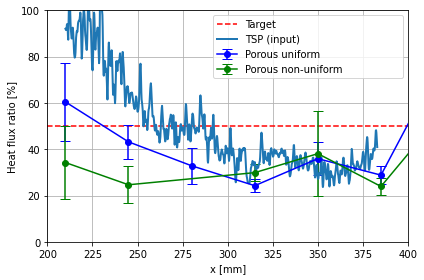

In [19]:
# ===== Plot 3: Heat flux ratio to Smooth [%] with error bars (using SE) =====
import pandas as pd  # 추가

plt.figure(figsize=(6, 4))
# Target 50% 점선
plt.axhline(y=50, color='red', linestyle='--', label='Target')

# Smooth 기준값
xs_ref, ys_ref, err_ref = group_q["Smooth"]
ref_dict_mean = dict(zip(xs_ref, ys_ref))
ref_dict_se   = dict(zip(xs_ref, err_ref))   # 이미 σ/√n 값이 들어있다고 가정

# Porous 그룹들에 대해 비율 계산
for gname in ["Porous uniform", "Porous non-uniform"]:
    if gname not in group_q:
        continue
    xs, ys, errs = group_q[gname]
    ratios, ratio_errs, positions = [], [], []
    for x, y, e in zip(xs, ys, errs):
        if x in ref_dict_mean:
            mean_ref = ref_dict_mean[x]
            se_ref   = ref_dict_se[x]

            # 비율 [%]
            ratio = y / mean_ref * 100

            # 비율 표준오차 propagation
            if y > 0 and mean_ref > 0:
                ratio_se = ratio * np.sqrt((e / y) ** 2 + (se_ref / mean_ref) ** 2)
            else:
                ratio_se = 0.0

            ratios.append(ratio)
            ratio_errs.append(ratio_se)
            positions.append(x)

    # Plot with error bars
    plt.errorbar(
        positions, ratios, yerr=ratio_errs, fmt='o-', capsize=5,
        color=group_colors.get(gname), label=gname+'                  '
    )

# ===== 추가: 엑셀 입력 선(TSP) =====
tsp_excel_path = r"/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/post processing code/TSP_data.xlsx"

# 1행부터 데이터가 곧바로 있으므로 header=None
# 1열: Position x [mm], 2열: Heat flux ratio [%]
tsp_df = pd.read_excel(tsp_excel_path, header=None, engine="openpyxl")
# 불필요한 NaN 행 제거 및 앞의 두 열만 사용
tsp_df = tsp_df.iloc[:, :2].dropna(how="any")

x_tsp = tsp_df.iloc[:, 0].to_numpy()
y_tsp = tsp_df.iloc[:, 1].to_numpy()

# 에러바 없이 선만 플롯 (색상은 기본값 사용)
plt.plot(x_tsp, y_tsp, '-', linewidth=2, label='TSP (input)')


# 출력 설정
plt.xlabel("x [mm]")
plt.ylabel("Heat flux ratio [%]")
plt.xlim(200, 400)
plt.ylim(0, 100)
plt.grid(True)
plt.legend(loc="upper right")
plt.tight_layout()

# 저장
outfile_ratio = "HeatFlux_Ratio_to_Smooth3.pdf"
for folder in experiment_folders:
    if expnum_from_folder(folder) in exclude_exps:
        continue
    path = os.path.join(base_dir, folder, outfile_ratio)
    plt.savefig(path, dpi=2000, bbox_inches='tight')
    print(f"✅ 저장 완료: {path}")

plt.show()


In [2]:
import os
import pandas as pd

# ---------------------------
# 입력 설정
# ---------------------------
base_dir = '/Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci'

experiment_folders = [
    '250718 exp#128 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    '250718 exp#129 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 smooth',
    '250718 exp#130 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250723 exp#131 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    # '250723 exp#132 half half cone PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',  # 제외
    '250725 exp#133 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    '250725 exp#134 half half cone2 PET150 x23 driven 0.2barg He M6.8 2.5MHz FL200x2 porous',
    # '250729 exp#135 half half cone non-uniform 2 PET150 x23 0.2barg He M6.8 2.5MHz FL200x2 smooth',  # 제외
    # '250917 exp#141 HHC Al 5T #173  driven 0.2barg He M6.8 2.5MHz FL200 TC'  # 제외
]

# 실험 번호 → 시간 범위 매핑 (요청하신 현재 버전 사용)
time_ranges = {
    128: (2.3, 3.3),
    129: (1.8, 2.8),
    130: (7.4, 8.4),
    131: (9.2, 10.2),
    # 132 제외
    133: (11.4-7.5, 11.5-7.5), 
    134: (10-7.5, 11-7.5),
    # 135, 141 제외
}

# 출력 엑셀 경로 (통합 파일, 실험별 시트 구성)
save_excel_path = os.path.join(base_dir, 'HeatFlux_stats_exp128_129_130_131_133_134.xlsx')

# ---------------------------
# 유틸 함수
# ---------------------------
def extract_exp_num(folder_name: str) -> int:
    """폴더명에서 exp# 숫자 추출"""
    return int(folder_name.split("exp#")[1].split()[0])

def build_stats_for_experiment(folder_name: str, start_ms: float, end_ms: float) -> pd.DataFrame:
    """
    해당 실험 폴더의 HeatFlux_data_for_gnuplot.dat에서
    시간 구간 필터 후 위치별 평균/표준편차/샘플수를 DataFrame으로 반환
    """
    folder_path = os.path.join(base_dir, folder_name)
    data_path = os.path.join(folder_path, "HeatFlux_data_for_gnuplot.dat")

    if not os.path.exists(data_path):
        print(f"[경고] 파일 없음: {data_path}")
        return pd.DataFrame()

    # 탭 구분
    df = pd.read_csv(data_path, sep="\t")

    # 시간 컬럼명 가정: "time [ms]"
    if "time [ms]" not in df.columns:
        print(f"[경고] 'time [ms]' 컬럼을 찾을 수 없음: {data_path}")
        return pd.DataFrame()

    # 시간 범위 필터
    df_range = df[(df["time [ms]"] >= start_ms) & (df["time [ms]"] <= end_ms)]
    if df_range.empty:
        print(f"[경고] 시간 구간({start_ms}~{end_ms} ms)에 데이터가 없음: {data_path}")
        return pd.DataFrame()

    positions, means, stds, ns = [], [], [], []
    # 첫 컬럼(time)을 제외한 센서 컬럼 처리
    for col in df_range.columns[1:]:
        # 컬럼명 예: "q@150mm" 또는 "something @150mm"
        if "@" not in col or "mm" not in col:
            # 열유속이 아닌 보조 컬럼일 수 있으므로 스킵
            continue

        try:
            pos = int(col.split("@")[1].replace("mm", "").strip())
        except Exception:
            # 파싱 실패 시 스킵
            continue

        q_values = df_range[col].dropna()
        if q_values.empty:
            continue

        positions.append(pos)
        means.append(q_values.mean())
        stds.append(q_values.std(ddof=1))  # 표본 표준편차
        ns.append(q_values.shape[0])

    if not positions:
        print(f"[경고] 유효한 열유속 컬럼이 없음: {data_path}")
        return pd.DataFrame()

    # 정렬
    sorted_data = sorted(zip(positions, means, stds, ns), key=lambda x: x[0])
    positions, means, stds, ns = zip(*sorted_data)

    result = pd.DataFrame({
        "Position_mm": positions,
        "q_mean_Wm2": means,
        "q_std_Wm2": stds,
        "n_samples": ns,
        "time_window_ms": [f"{start_ms}–{end_ms}"] * len(positions)
    })
    return result

# ---------------------------
# 메인 처리: 통합 엑셀 작성
# ---------------------------
with pd.ExcelWriter(save_excel_path, engine="openpyxl") as writer:
    for folder_name in experiment_folders:
        exp_num = extract_exp_num(folder_name)
        if exp_num not in {128, 129, 130, 131, 133, 134}:
            continue

        if exp_num not in time_ranges:
            print(f"[경고] 실험 #{exp_num}의 시간 구간이 time_ranges에 정의되어 있지 않음. 스킵.")
            continue

        start_ms, end_ms = time_ranges[exp_num]
        df_stats = build_stats_for_experiment(folder_name, start_ms, end_ms)

        if df_stats.empty:
            print(f"[경고] 실험 #{exp_num} 통계 DataFrame이 비어 있음. 시트 생성 생략.")
            continue

        sheet_name = f"exp#{exp_num}"
        df_stats.to_excel(writer, index=False, sheet_name=sheet_name)
        # openpyxl에는 set_column()이 없음 → 삭제


print(f"✅ 엑셀 저장 완료: {save_excel_path}")


✅ 엑셀 저장 완료: /Users/heojeongmu/Dropbox (개인용) (1)/시흥 실험실/06. Labview log/pitot and tube pci/HeatFlux_stats_exp128_129_130_131_133_134.xlsx
